In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16  # Increased from 14
plt.rcParams['axes.titlesize'] = 24  # Increased from 18
plt.rcParams['axes.labelsize'] = 20  # Increased from 16
plt.rcParams['xtick.labelsize'] = 16  # Increased from 14
plt.rcParams['ytick.labelsize'] = 16  # Increased from 14
plt.rcParams['legend.fontsize'] = 18  # Increased from 14
plt.rcParams['lines.linewidth'] = 4  # Bolder lines
plt.rcParams['lines.markersize'] = 10  # Larger markers
plt.rcParams['axes.linewidth'] = 2  # Thicker axes
plt.rcParams['grid.linewidth'] = 1.5  # Thicker grid

df_bn = pd.read_csv('csv/merged_tunedlens_data_bn.csv', encoding='utf-8')
df_mr = pd.read_csv('csv/merged_tunedlens_data_mr.csv', encoding='utf-8')
df_hi = pd.read_csv('csv/merged_tunedlens_data_hi.csv', encoding='utf-8')

# Add language labels
df_bn['language'] = 'Bengali'
df_mr['language'] = 'Marathi'
df_hi['language'] = 'Hindi'

df_combined = pd.concat([df_bn, df_mr, df_hi], ignore_index=True)

# Enhanced colors with better contrast for research papers
colors = {
    'Bengali': '#2E4BC6',    # Strong blue
    'Marathi': '#C62E4B',    # Strong red
    'Hindi': '#2EC64B'       # Strong green
}

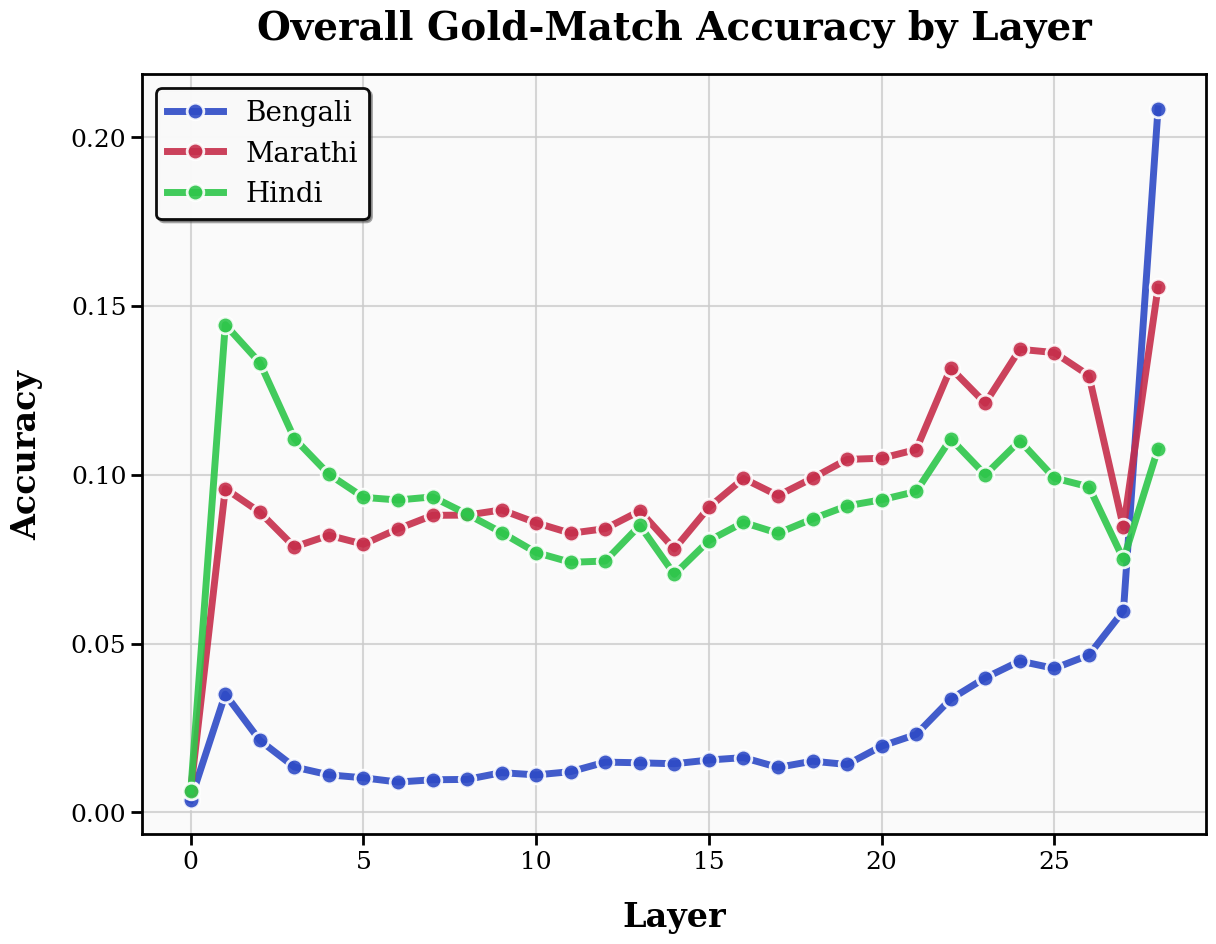

In [3]:
accuracy_layer_combined = df_combined.groupby(['layer', 'language'])['match_gold_answer'].mean().reset_index(name='accuracy')

fig, ax = plt.subplots(figsize=(14, 10))  # Larger figure
plt.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.12)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = accuracy_layer_combined[accuracy_layer_combined['language'] == lang]
    ax.plot(lang_data['layer'], lang_data['accuracy'], 
           marker='o', color=colors[lang], label=lang, 
           linewidth=5, markersize=12, markeredgewidth=2, 
           markeredgecolor='white', alpha=0.9)

ax.set_title('Overall Gold-Match Accuracy by Layer', 
            fontsize=28, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Layer', fontsize=24, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Accuracy', fontsize=24, fontweight='bold', color='#000000', labelpad=20)

# Enhanced grid
ax.grid(True, color='#CCCCCC', alpha=0.8, linewidth=1.5)
ax.set_facecolor('#FAFAFA')  # Light background

# Bold spines
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('#000000')

ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2, length=8)

# Enhanced legend
legend = ax.legend(frameon=True, fancybox=True, shadow=True, 
                  fontsize=20, loc='best', framealpha=0.95)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('#000000')

# Save as PDF with high DPI
plt.savefig('finalplots/accuracy_by_layer.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

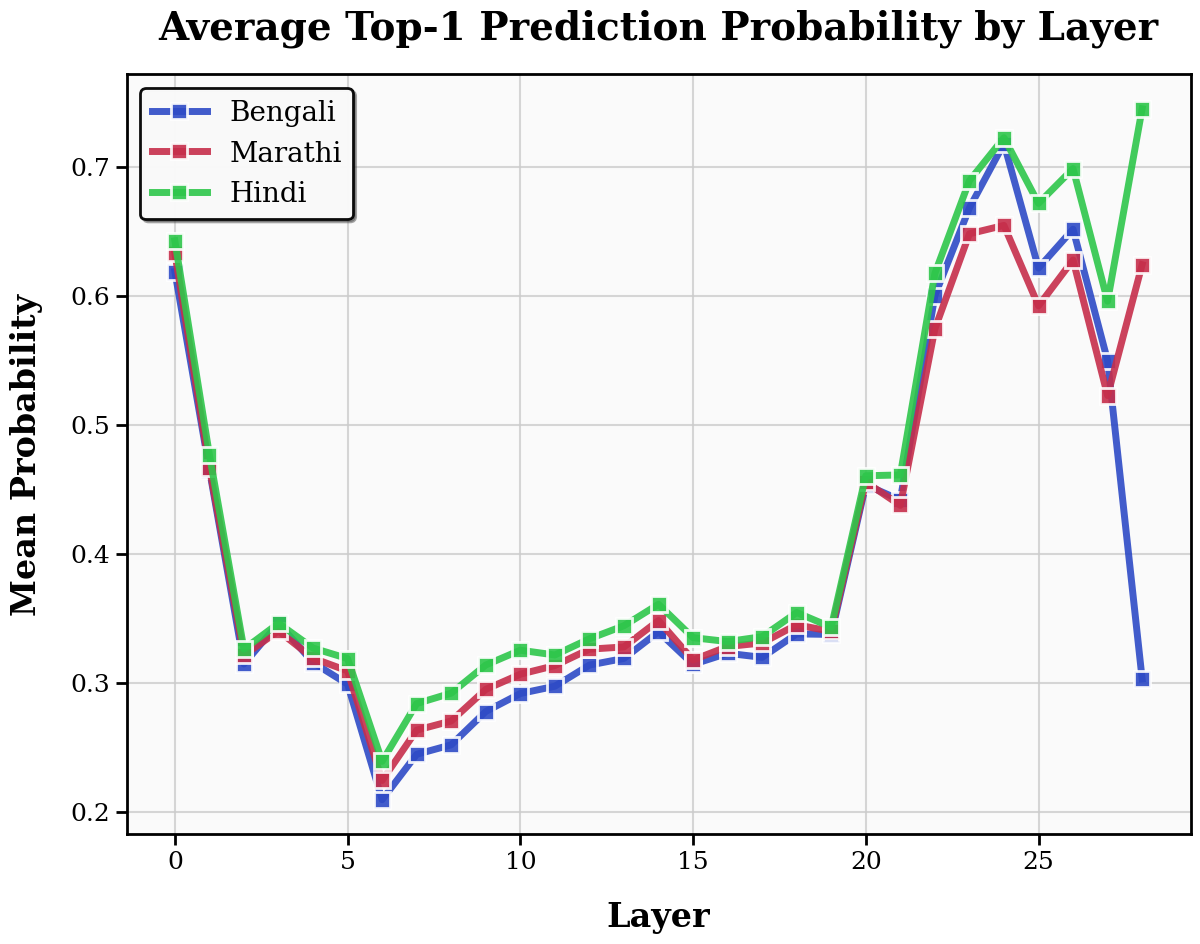

In [4]:
avg_prob_layer_combined = df_combined[df_combined['rank'] == 1].groupby(['layer', 'language'])['probability'].mean().reset_index(name='avg_top1_prob')

fig, ax = plt.subplots(figsize=(14, 10))  # Larger figure
plt.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.12)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = avg_prob_layer_combined[avg_prob_layer_combined['language'] == lang]
    ax.plot(lang_data['layer'], lang_data['avg_top1_prob'], 
           marker='s', color=colors[lang], label=lang, 
           linewidth=5, markersize=12, markeredgewidth=2, 
           markeredgecolor='white', alpha=0.9)

ax.set_title('Average Top-1 Prediction Probability by Layer', 
            fontsize=28, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Layer', fontsize=24, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Mean Probability', fontsize=24, fontweight='bold', color='#000000', labelpad=20)

# Enhanced grid
ax.grid(True, color='#CCCCCC', alpha=0.8, linewidth=1.5)
ax.set_facecolor('#FAFAFA')  # Light background

# Bold spines
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('#000000')

ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2, length=8)

# Enhanced legend
legend = ax.legend(frameon=True, fancybox=True, shadow=True, 
                  fontsize=20, loc='best', framealpha=0.95)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('#000000')

plt.savefig('finalplots/top1_probability_by_layer.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


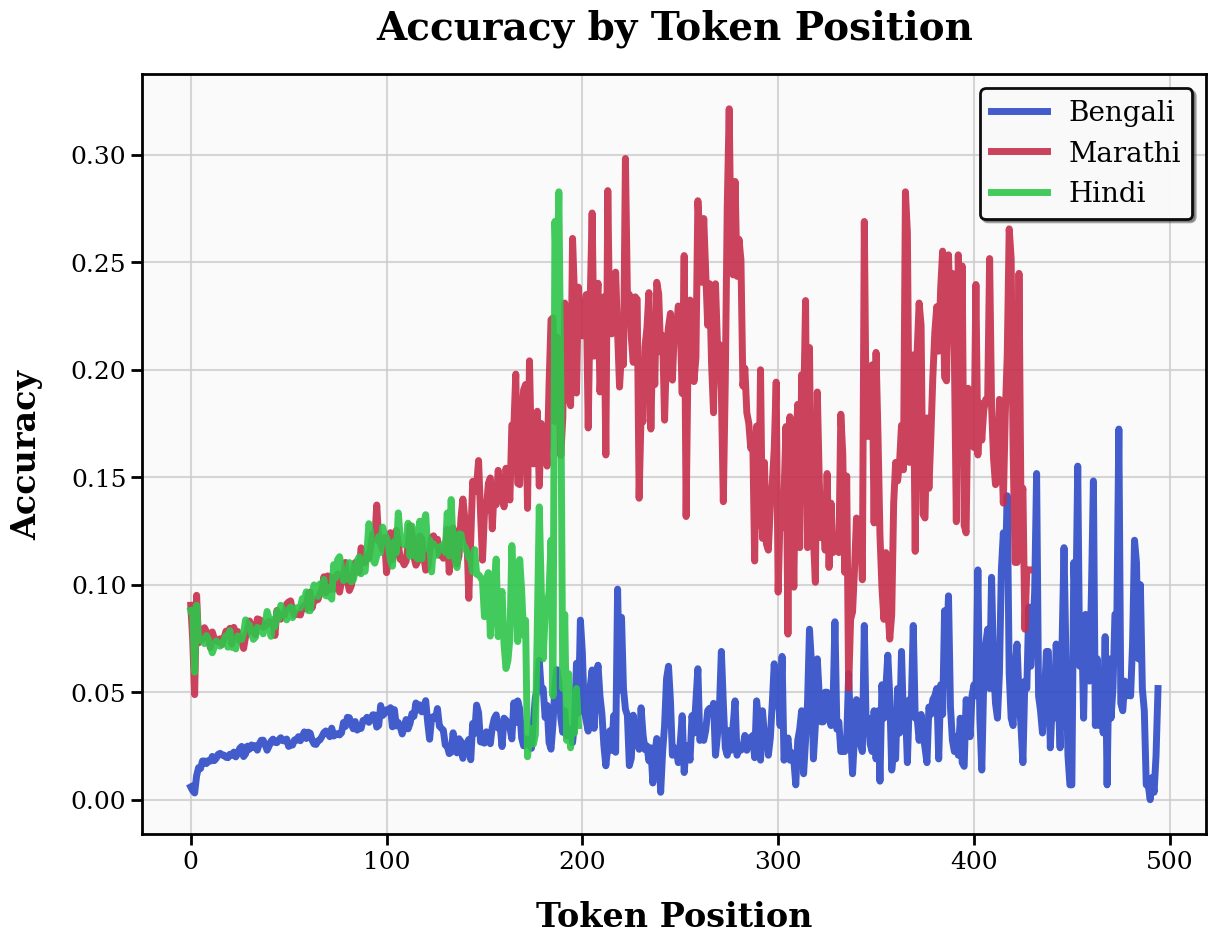

In [5]:
pos_acc_combined = df_combined.groupby(['token_position', 'language'])['match_gold_answer'].mean().reset_index(name='accuracy')

fig, ax = plt.subplots(figsize=(14, 10))  # Larger figure
plt.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.12)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = pos_acc_combined[pos_acc_combined['language'] == lang]
    ax.plot(lang_data['token_position'], lang_data['accuracy'], 
           color=colors[lang], label=lang, linewidth=5, alpha=0.9)

ax.set_title('Accuracy by Token Position', 
            fontsize=28, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Token Position', fontsize=24, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Accuracy', fontsize=24, fontweight='bold', color='#000000', labelpad=20)

# Enhanced grid
ax.grid(True, color='#CCCCCC', alpha=0.8, linewidth=1.5)
ax.set_facecolor('#FAFAFA')  # Light background

# Bold spines
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('#000000')

ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2, length=8)

# Enhanced legend
legend = ax.legend(frameon=True, fancybox=True, shadow=True, 
                  fontsize=20, loc='best', framealpha=0.95)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('#000000')

plt.savefig('finalplots/accuracy_by_token_position.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

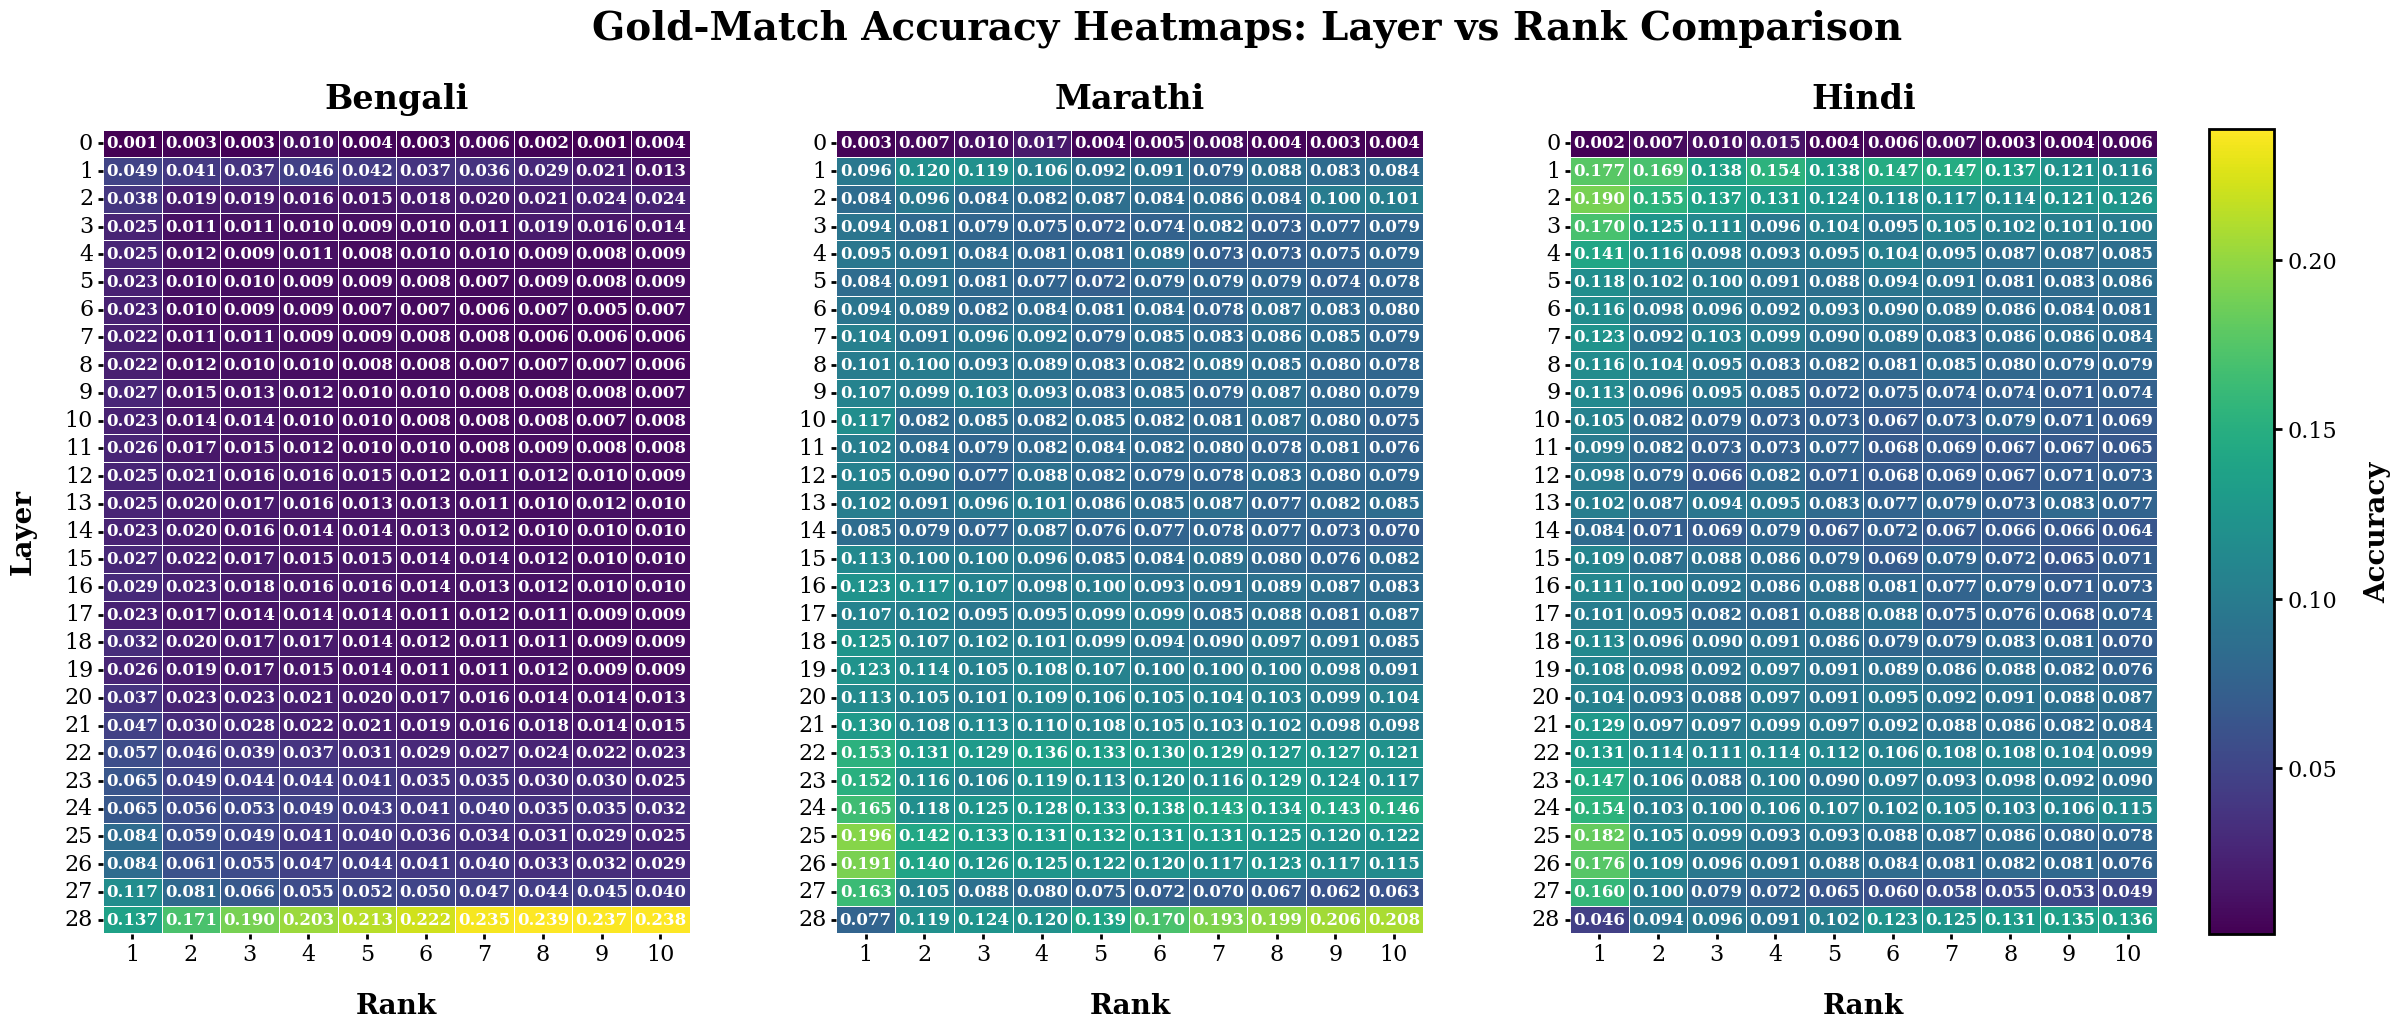

In [6]:
def prepare_heatmap_data(df, lang_name):
    heat_df = df[df['rank'] <= 10].groupby(['layer', 'rank'])['match_gold_answer'].mean().reset_index()
    heat_pivot = heat_df.pivot(index='layer', columns='rank', values='match_gold_answer')
    return heat_pivot

# Create pivot tables for each language
heat_pivot_bn = prepare_heatmap_data(df_bn, 'Bengali')
heat_pivot_mr = prepare_heatmap_data(df_mr, 'Marathi')
heat_pivot_hi = prepare_heatmap_data(df_hi, 'Hindi')

# Define common color scale for consistency
vmin = min(heat_pivot_bn.min().min(), heat_pivot_mr.min().min(), heat_pivot_hi.min().min())
vmax = max(heat_pivot_bn.max().max(), heat_pivot_mr.max().max(), heat_pivot_hi.max().max())

# %%
# Enhanced Combined Heatmap for Research Paper (Fixed spacing)
fig, axes = plt.subplots(1, 3, figsize=(26, 12))  # Taller figure to accommodate titles
plt.subplots_adjust(left=0.06, right=0.85, top=0.82, bottom=0.15, wspace=0.25)  # More space at top

# Enhanced heatmap settings - NOW WITH ANNOTATIONS
heatmap_kws = {
    'cmap': 'viridis',
    'vmin': vmin,
    'vmax': vmax,
    'cbar': False,
    'annot': True,  # Changed from False to True
    'fmt': '.3f',   # Format for 3 decimal places
    'annot_kws': {'size': 12, 'weight': 'bold', 'color': 'white'},  # Styling for annotations
    'square': False,
    'linewidths': 0.5,
    'linecolor': 'white'
}

# Heatmap 1: Bengali
sns.heatmap(heat_pivot_bn, ax=axes[0], **heatmap_kws)
axes[0].set_title('Bengali', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)  # Reduced padding
axes[0].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[0].set_ylabel('Layer', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[0].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Heatmap 2: Marathi
sns.heatmap(heat_pivot_mr, ax=axes[1], **heatmap_kws)
axes[1].set_title('Marathi', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)  # Reduced padding
axes[1].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[1].set_ylabel('', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[1].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Heatmap 3: Hindi
sns.heatmap(heat_pivot_hi, ax=axes[2], **heatmap_kws)
axes[2].set_title('Hindi', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)  # Reduced padding
axes[2].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[2].set_ylabel('', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[2].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Enhanced colorbar
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cbar_ax = fig.add_axes([0.87, 0.15, 0.025, 0.67])  # Adjusted to match subplot area
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Accuracy', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
cbar.ax.tick_params(labelsize=16, colors='#000000', width=2, length=6)

# Enhanced main title with proper spacing
fig.suptitle('Gold-Match Accuracy Heatmaps: Layer vs Rank Comparison', 
             fontsize=28, fontweight='bold', y=0.92, color='#000000')  # Moved higher and smaller

# Save with maximum quality
plt.savefig('finalplots/heatmap_combined.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

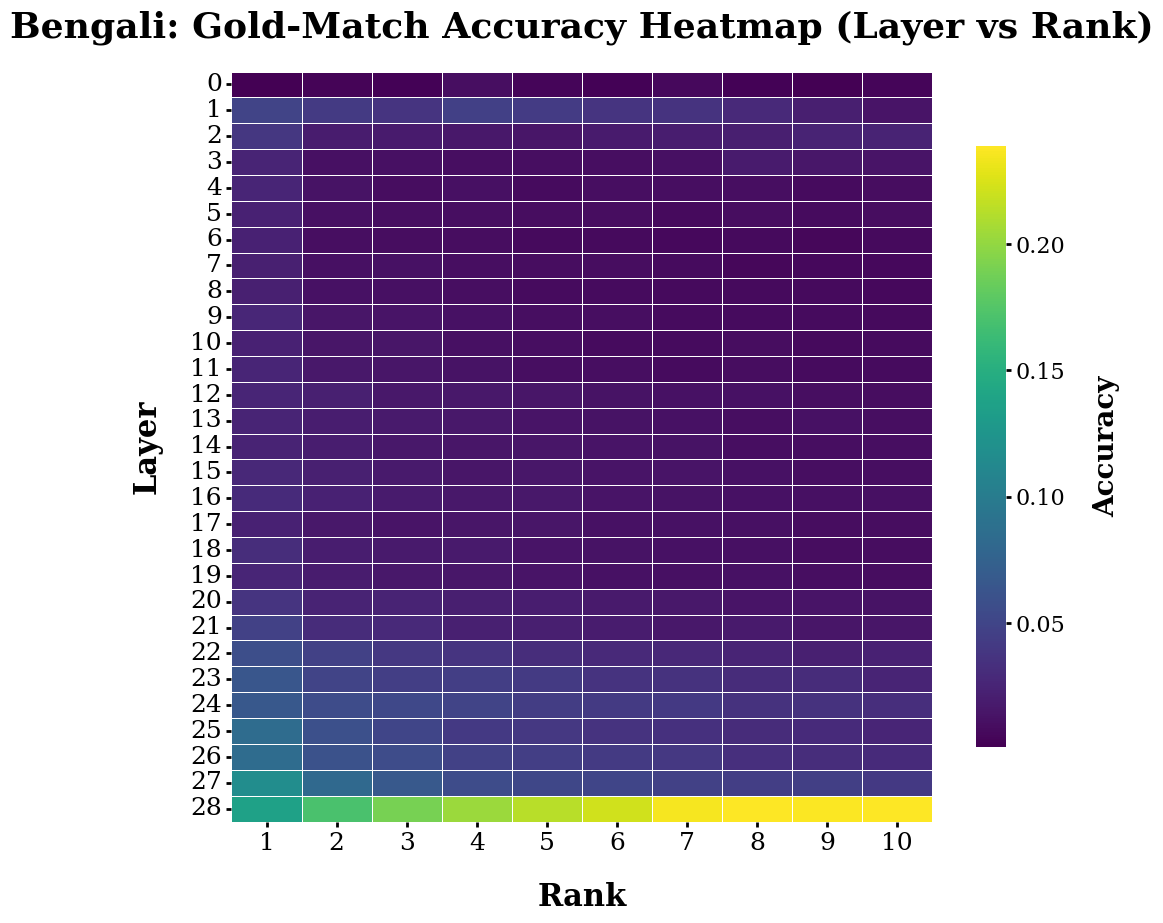

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.subplots_adjust(left=0.12, right=0.85, top=0.9, bottom=0.15)

sns.heatmap(heat_pivot_bn, cmap='viridis', ax=ax, 
            vmin=vmin, vmax=vmax, cbar=True,
            cbar_kws={'label': 'Accuracy', 'shrink': 0.8},
            annot=False, fmt='.3f', square=False,
            linewidths=0.5, linecolor='white')

ax.set_title('Bengali: Gold-Match Accuracy Heatmap (Layer vs Rank)', 
            fontsize=26, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Rank', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Layer', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2)

# Enhance colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, colors='#000000', width=2)
cbar.set_label('Accuracy', fontsize=20, fontweight='bold', color='#000000', labelpad=20)

plt.savefig('finalplots/heatmap_bengali.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

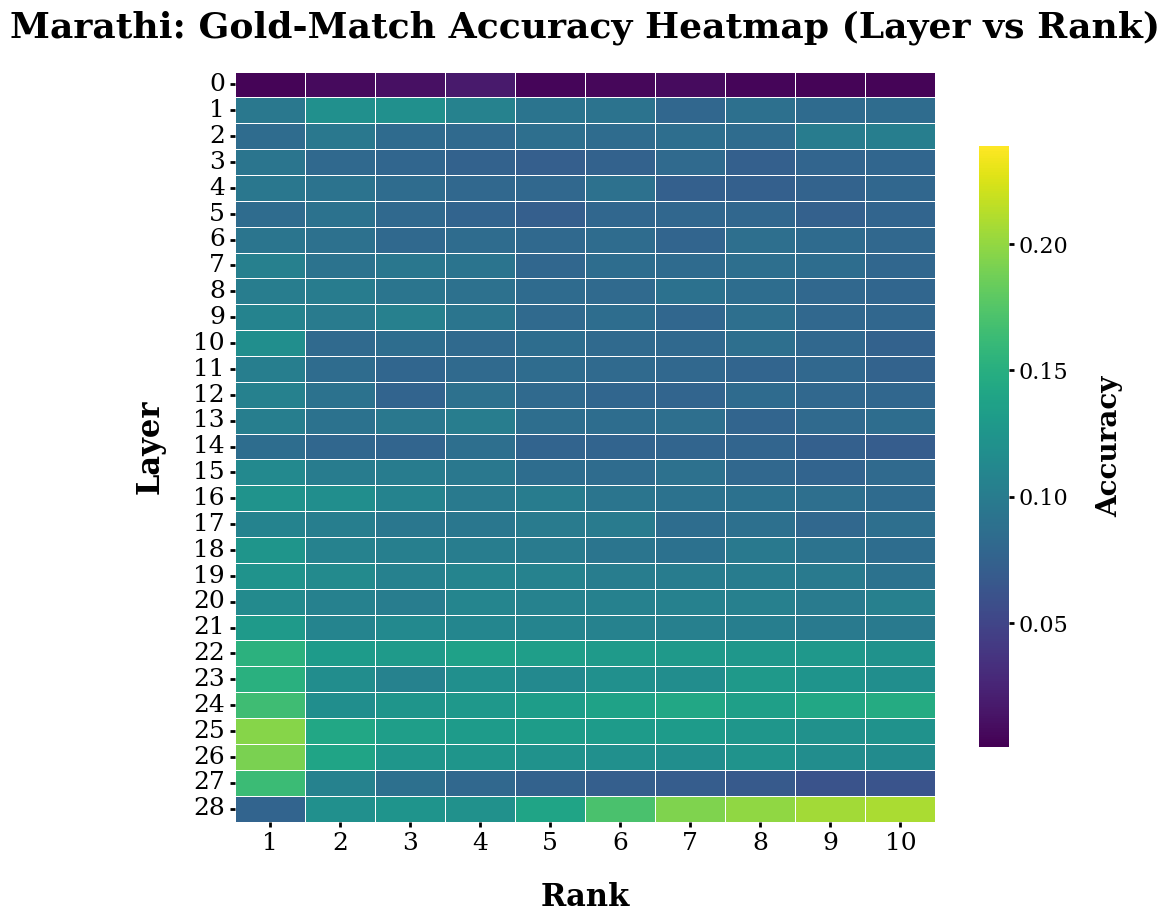

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.subplots_adjust(left=0.12, right=0.85, top=0.9, bottom=0.15)

sns.heatmap(heat_pivot_mr, cmap='viridis', ax=ax, 
            vmin=vmin, vmax=vmax, cbar=True,
            cbar_kws={'label': 'Accuracy', 'shrink': 0.8},
            annot=False, fmt='.3f', square=False,
            linewidths=0.5, linecolor='white')

ax.set_title('Marathi: Gold-Match Accuracy Heatmap (Layer vs Rank)', 
            fontsize=26, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Rank', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Layer', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2)

# Enhance colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, colors='#000000', width=2)
cbar.set_label('Accuracy', fontsize=20, fontweight='bold', color='#000000', labelpad=20)

plt.savefig('finalplots/heatmap_marathi.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

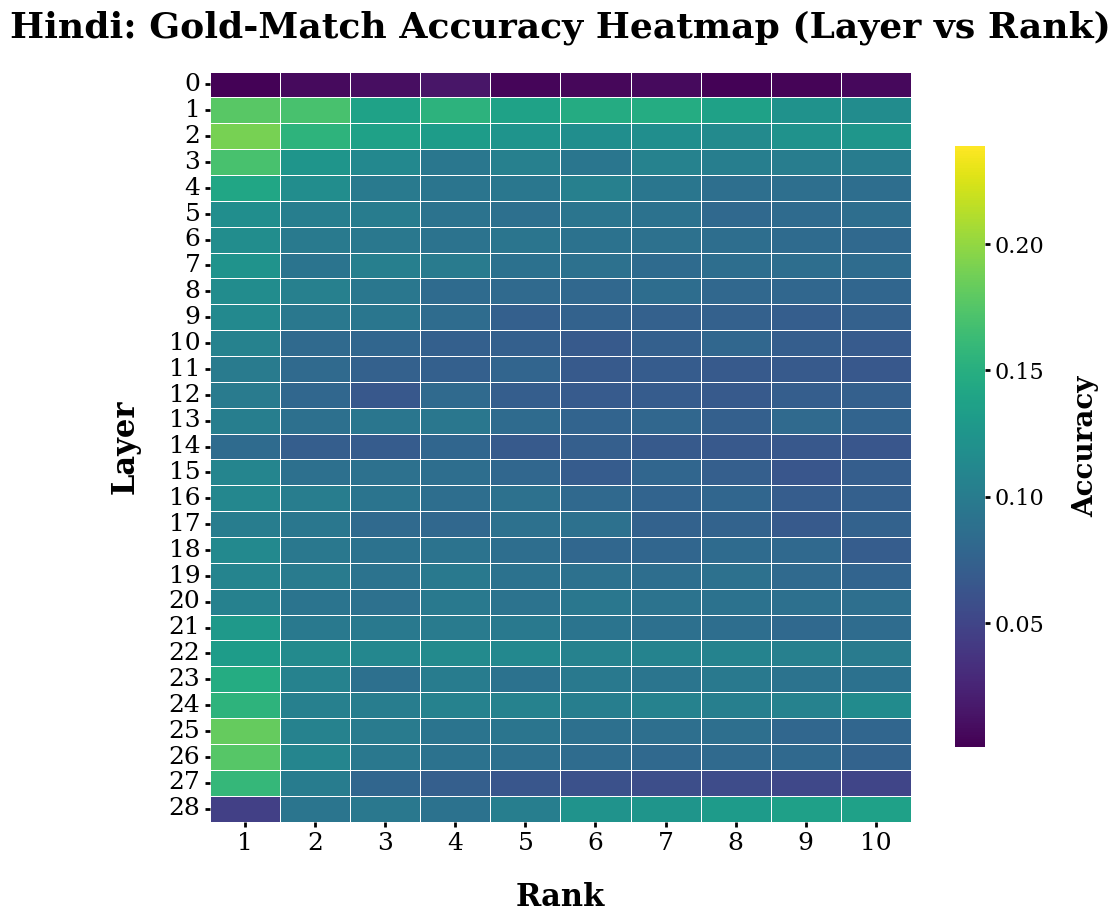

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.subplots_adjust(left=0.12, right=0.85, top=0.9, bottom=0.15)

sns.heatmap(heat_pivot_hi, cmap='viridis', ax=ax, 
            vmin=vmin, vmax=vmax, cbar=True,
            cbar_kws={'label': 'Accuracy', 'shrink': 0.8},
            annot=False, fmt='.3f', square=False,
            linewidths=0.5, linecolor='white')

ax.set_title('Hindi: Gold-Match Accuracy Heatmap (Layer vs Rank)', 
            fontsize=26, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Rank', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Layer', fontsize=22, fontweight='bold', color='#000000', labelpad=20)
ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2)

# Enhance colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, colors='#000000', width=2)
cbar.set_label('Accuracy', fontsize=20, fontweight='bold', color='#000000', labelpad=20)

plt.savefig('finalplots/heatmap_hindi.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


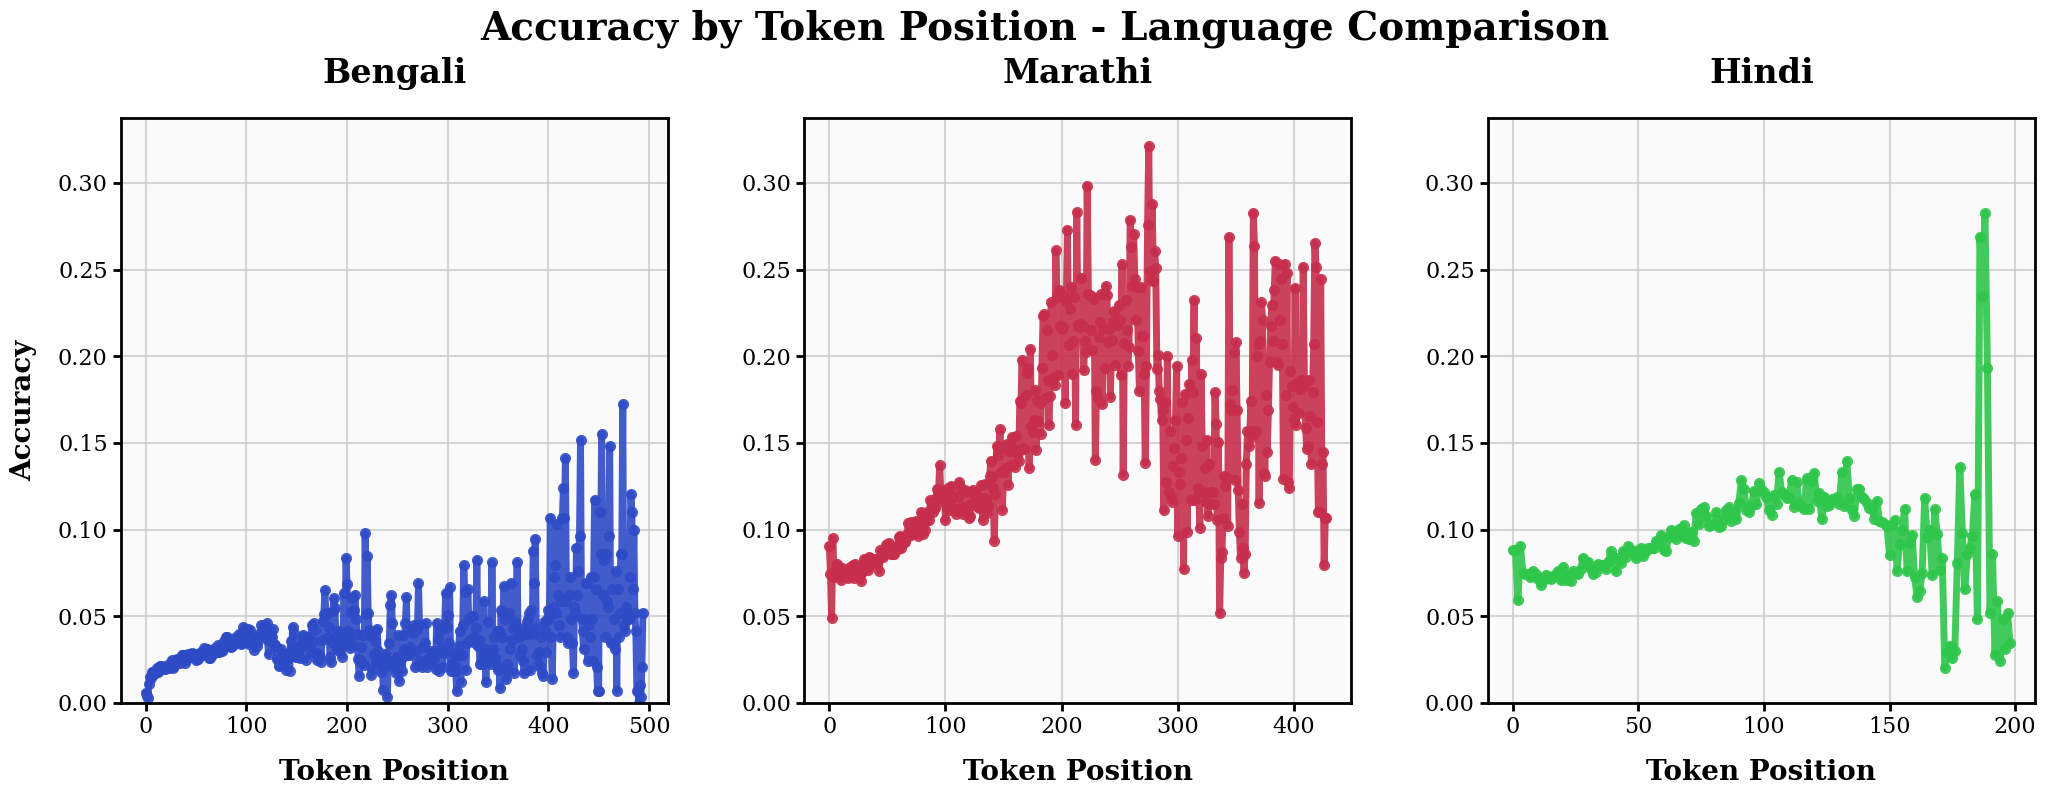

In [10]:
pos_acc_combined = df_combined.groupby(['token_position', 'language'])['match_gold_answer'].mean().reset_index(name='accuracy')

# Create subplots for each language
fig, axes = plt.subplots(1, 3, figsize=(22, 9))  # Slightly taller
plt.subplots_adjust(left=0.08, right=0.95, top=0.80, bottom=0.15, wspace=0.25)  # More space at top

languages = ['Bengali', 'Marathi', 'Hindi']

for i, lang in enumerate(languages):
    ax = axes[i]
    ax.set_axisbelow(True)
    
    lang_data = pos_acc_combined[pos_acc_combined['language'] == lang]
    ax.plot(lang_data['token_position'], lang_data['accuracy'], 
           color=colors[lang], linewidth=5, alpha=0.9, marker='o', 
           markersize=8, markeredgewidth=0, markeredgecolor=colors[lang])  # Removed white edges
    
    ax.set_title(f'{lang}', fontsize=24, fontweight='bold', 
                color='#000000', pad=25)  # Increased padding
    ax.set_xlabel('Token Position', fontsize=20, fontweight='bold', 
                 color='#000000', labelpad=15)
    
    # Only add y-label to the first subplot
    if i == 0:
        ax.set_ylabel('Accuracy', fontsize=20, fontweight='bold', 
                     color='#000000', labelpad=15)
    
    # Enhanced grid and background
    ax.grid(True, color='#CCCCCC', alpha=0.8, linewidth=1.5)
    ax.set_facecolor('#FAFAFA')
    
    # Bold spines
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('#000000')
    
    ax.tick_params(axis='both', colors='#000000', labelsize=16, width=2, length=6)
    
    # Set consistent y-axis limits across all subplots
    y_min = pos_acc_combined['accuracy'].min() * 0.95
    y_max = pos_acc_combined['accuracy'].max() * 1.05
    ax.set_ylim(y_min, y_max)

# Add main title with more spacing
fig.suptitle('Accuracy by Token Position - Language Comparison', 
             fontsize=28, fontweight='bold', y=0.92, color='#000000')  # Moved higher

plt.savefig('finalplots/accuracy_by_token_position_subplots_enhanced.pdf', 
           format='pdf', dpi=600, bbox_inches='tight')
plt.show()

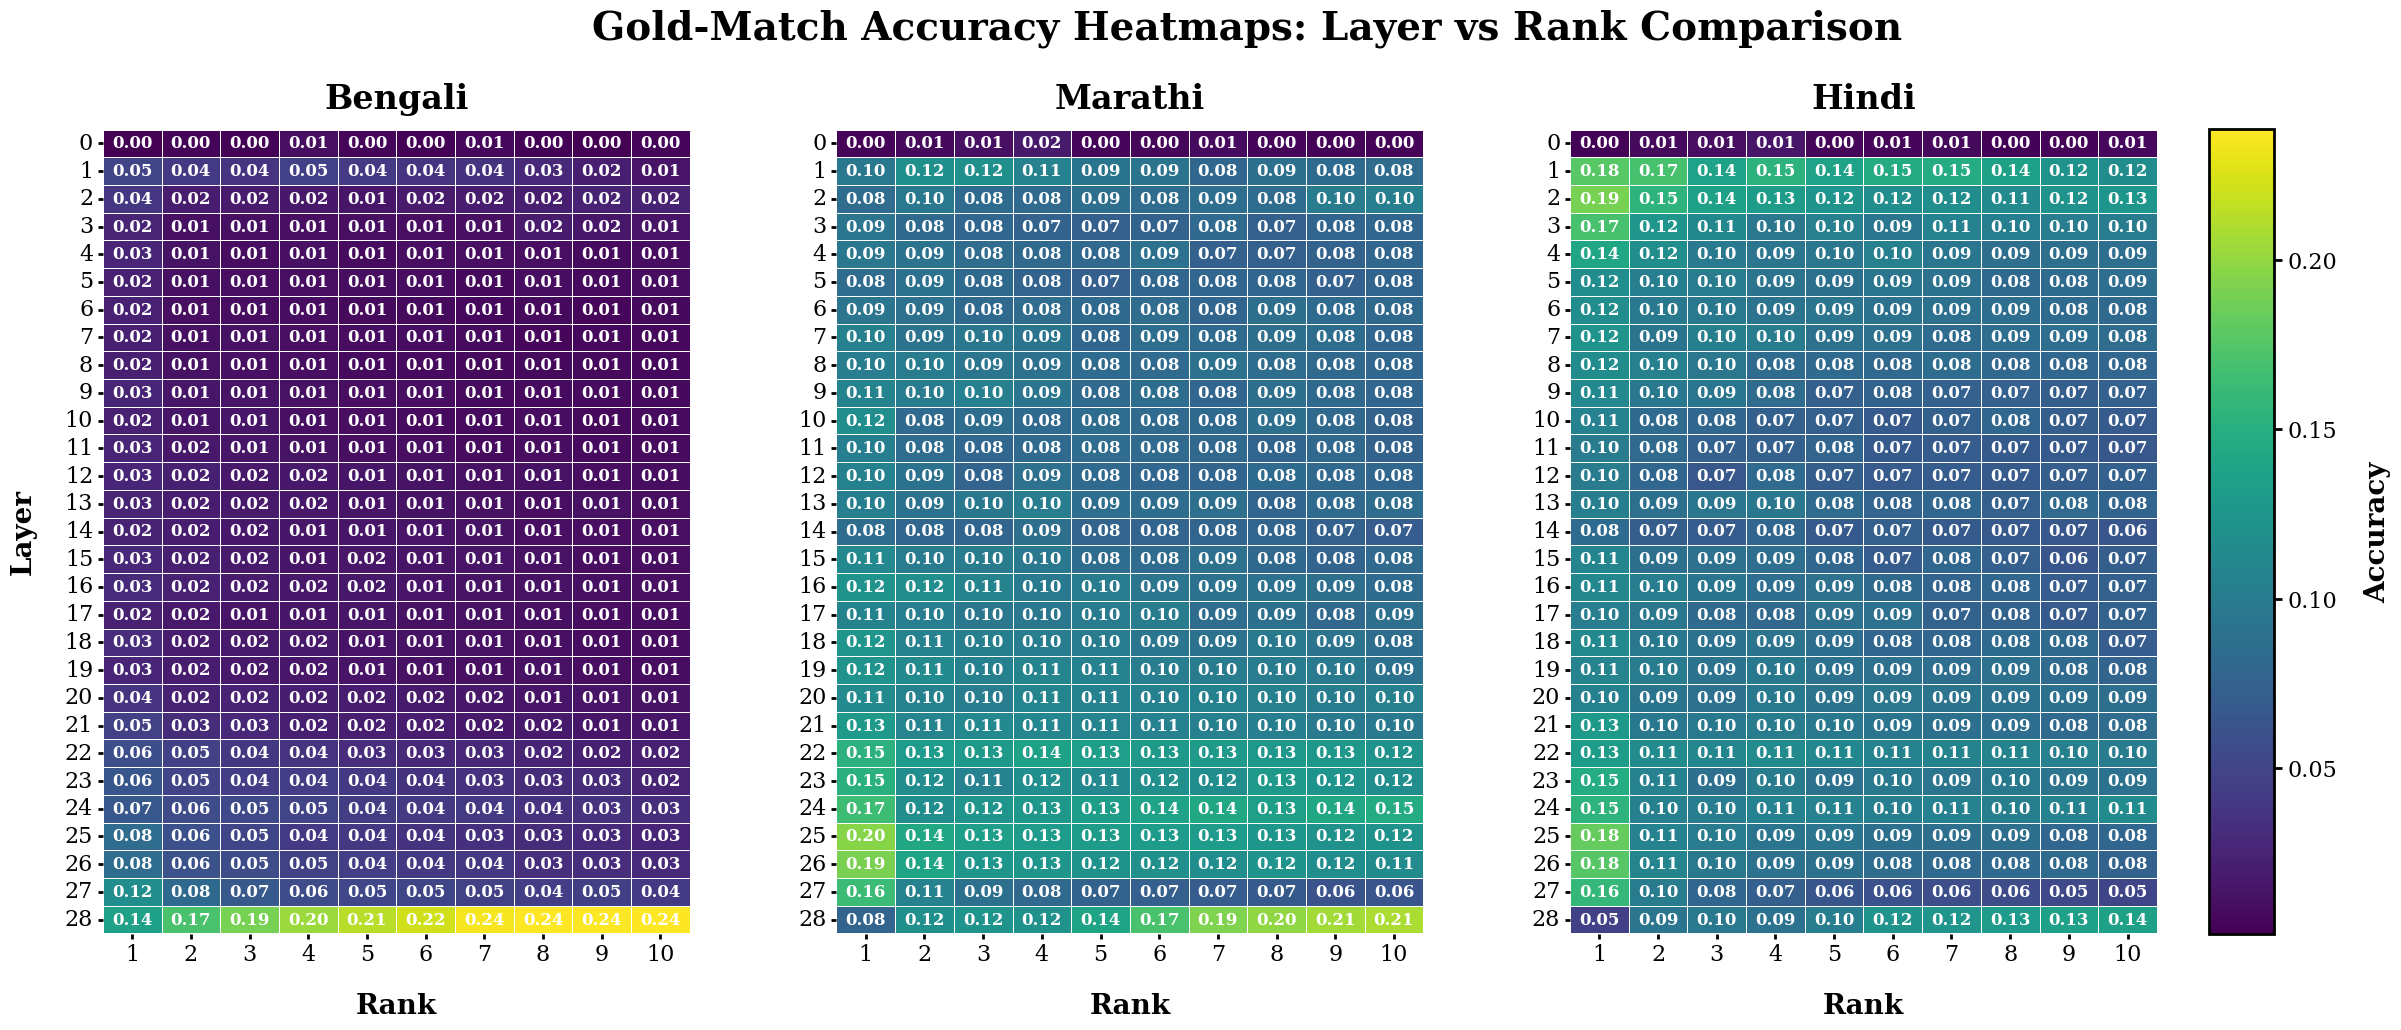

In [12]:
def prepare_heatmap_data(df, lang_name):
    heat_df = df[df['rank'] <= 10].groupby(['layer', 'rank'])['match_gold_answer'].mean().reset_index()
    heat_pivot = heat_df.pivot(index='layer', columns='rank', values='match_gold_answer')
    return heat_pivot

# Create pivot tables for each language
heat_pivot_bn = prepare_heatmap_data(df_bn, 'Bengali')
heat_pivot_mr = prepare_heatmap_data(df_mr, 'Marathi')
heat_pivot_hi = prepare_heatmap_data(df_hi, 'Hindi')

# Define common color scale for consistency
vmin = min(heat_pivot_bn.min().min(), heat_pivot_mr.min().min(), heat_pivot_hi.min().min())
vmax = max(heat_pivot_bn.max().max(), heat_pivot_mr.max().max(), heat_pivot_hi.max().max())

# Enhanced Combined Heatmap for Research Paper (Fixed spacing)
fig, axes = plt.subplots(1, 3, figsize=(26, 12))  # Taller figure to accommodate titles
plt.subplots_adjust(left=0.06, right=0.85, top=0.82, bottom=0.15, wspace=0.25)  # More space at top

heatmap_kws = {
    'cmap': 'viridis',
    'vmin': vmin,
    'vmax': vmax,
    'cbar': False,
    'annot': True,
    'fmt': '.2f',  # Changed to 2 decimal places
    'annot_kws': {'size': 12, 'weight': 'bold', 'color': 'white'},
    'square': False,
    'linewidths': 0.5,
    'linecolor': 'white'
}

# Heatmap 1: Bengali
sns.heatmap(heat_pivot_bn, ax=axes[0], **heatmap_kws)
axes[0].set_title('Bengali', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)
axes[0].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[0].set_ylabel('Layer', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[0].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Heatmap 2: Marathi
sns.heatmap(heat_pivot_mr, ax=axes[1], **heatmap_kws)
axes[1].set_title('Marathi', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)
axes[1].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[1].set_ylabel('', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[1].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Heatmap 3: Hindi
sns.heatmap(heat_pivot_hi, ax=axes[2], **heatmap_kws)
axes[2].set_title('Hindi', fontsize=24, fontweight='bold', 
                  color='#000000', pad=15)
axes[2].set_xlabel('Rank', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[2].set_ylabel('', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
axes[2].tick_params(axis='both', colors='#000000', labelsize=16, width=2)

# Enhanced colorbar
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cbar_ax = fig.add_axes([0.87, 0.15, 0.025, 0.67])  # Adjusted to match subplot area
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Accuracy', fontsize=20, fontweight='bold', color='#000000', labelpad=20)
cbar.ax.tick_params(labelsize=16, colors='#000000', width=2, length=6)

# Enhanced main title with proper spacing
fig.suptitle('Gold-Match Accuracy Heatmaps: Layer vs Rank Comparison', 
             fontsize=28, fontweight='bold', y=0.92, color='#000000')

# Save with maximum quality
plt.savefig('finalplots/heatmap_combined.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

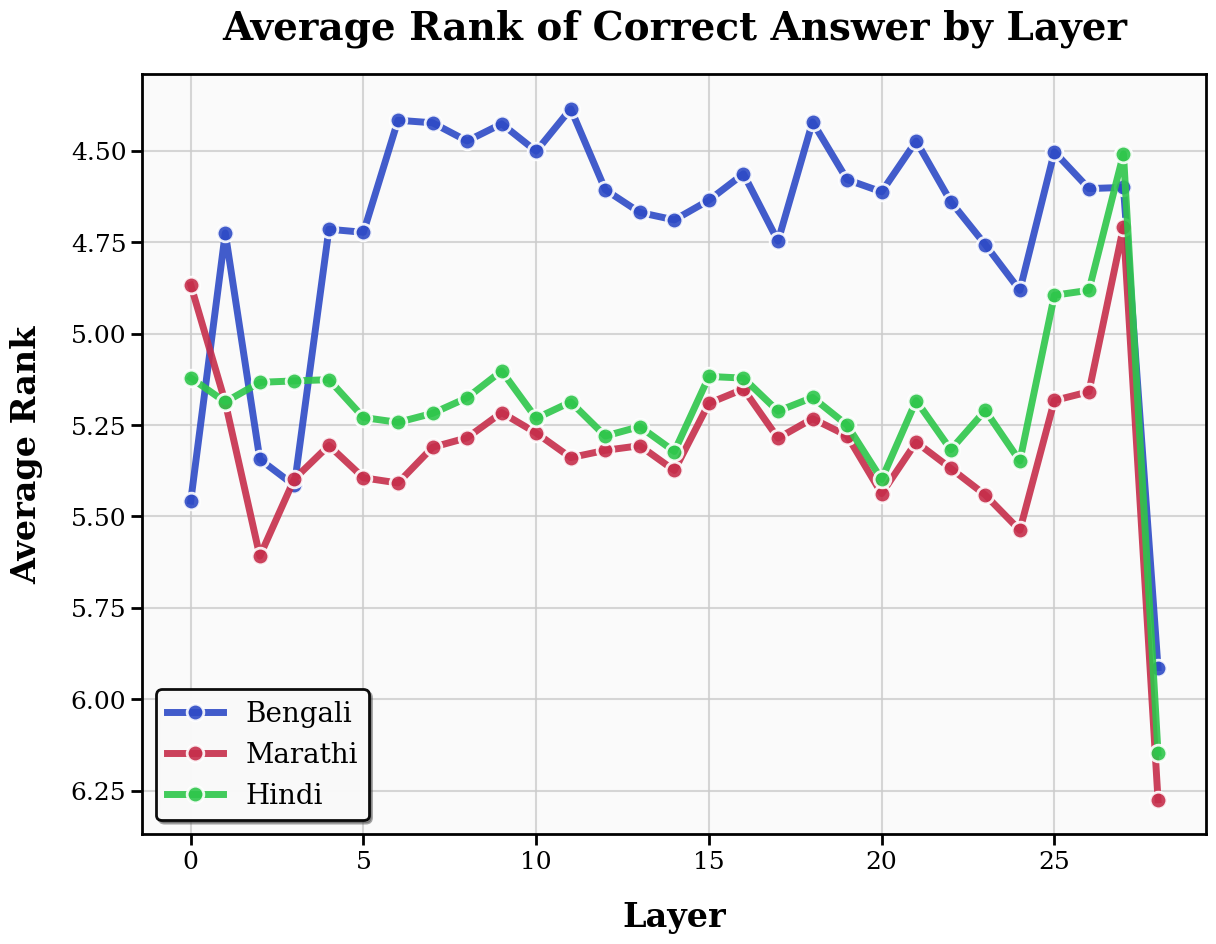

In [13]:
correct_answers = df_combined[df_combined['match_gold_answer'] == True]

# Group by layer and language to get average rank of correct answers
avg_rank_layer = correct_answers.groupby(['layer', 'language'])['rank'].mean().reset_index(name='avg_rank')

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
plt.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.12)
ax.set_axisbelow(True)

# Plot for each language
for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = avg_rank_layer[avg_rank_layer['language'] == lang]
    ax.plot(lang_data['layer'], lang_data['avg_rank'], 
           marker='o', color=colors[lang], label=lang, 
           linewidth=5, markersize=12, markeredgewidth=2, 
           markeredgecolor='white', alpha=0.9)

ax.set_title('Average Rank of Correct Answer by Layer', 
            fontsize=28, fontweight='bold', color='#000000', pad=25)
ax.set_xlabel('Layer', fontsize=24, fontweight='bold', color='#000000', labelpad=20)
ax.set_ylabel('Average Rank', fontsize=24, fontweight='bold', color='#000000', labelpad=20)

# Enhanced grid
ax.grid(True, color='#CCCCCC', alpha=0.8, linewidth=1.5)
ax.set_facecolor('#FAFAFA')  # Light background

# Bold spines
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('#000000')

ax.tick_params(axis='both', colors='#000000', labelsize=18, width=2, length=8)

# Enhanced legend
legend = ax.legend(frameon=True, fancybox=True, shadow=True, 
                  fontsize=20, loc='best', framealpha=0.95)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('#000000')

# Invert y-axis since lower rank is better
ax.invert_yaxis()

# Save as PDF with high DPI
plt.savefig('finalplots/avg_rank_correct_by_layer.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()